$$Gradient = \frac{Change\ in\ Y}{Change\ in\ X}$$   
positive, negative, and undefinable($\delta{x}$ = zero).  
##### Rise and Run   
Sometimes the horizontal change is called "run", and the vertical change is called "rise" or "fall"

#### Gradient Descent     
**Note** Read Y axis label as Loss   

![](../Figures/gradient_descent.png)   

[IIT Kanpur Notes](https://home.iitk.ac.in/~shalab/regression/Chapter2-Regression-SimpleLinearRegressionAnalysis.pdf)

### Linear Regression   
##### Gradient Descent   
Minimises the cost function a different way: gradient descent.   
This is an iterative algorithm. We apply a certain update rule over and over again.  
If lucky, our iterates will gradually improve according to our objective function.  
1. initialize the weights to some value (e.g. all zeros)    
2. repeatedly adjust them in the direction that decreases the loss function     
3. repeat this procedure until the iterates converge, or stop changing much 
4. If we’re lucky, the final iterate will be close to the optimum.  

```
function gradient_descent(X, y, learning_rate, num_iterations):
    Initialize parameters  = θ
    for iter in range(num_iterations):
        predictions = compute_predictions(X, θ)
        gradient = compute_gradient(X, y, predictions)
        update_parameters(θ, gradient, learning_rate)
    return θ

function compute_predictions(X, θ):
    return X*θ

function compute_gradient(X, y, predictions):
    error = predictions - y
    gradient = Xᵀ * error / m
    return gradient

function update_parameters(θ, gradient, learning_rate):
    θ = θ - learning_rate ⨉ gradient
```

##### Pros   
Flexibility: Gradient Descent can be used with various cost functions and can handle non-linear regression problems.  
Scalability: Gradient Descent is scalable to large datasets since it updates the parameters for each training example one at a time.  
Convergence: Gradient Descent can converge to the global minimum of the cost function, provided that the learning rate is set appropriately.  
##### Cons   
Sensitivity to Learning Rate: The choice of learning rate can be critical in Gradient Descent since using a high learning rate can cause the algorithm to overshoot the minimum, while a low learning rate can make the algorithm converge slowly.   
Slow Convergence: Gradient Descent may require more iterations to converge to the minimum since it updates the parameters for each training example one at a time.  
Local Minima: Gradient Descent can get stuck in local minima if the cost function has multiple local minima.  
Noisy updates: The updates in Gradient Descent are noisy and have a high variance, which can make the optimization process less stable and lead to oscillations around the minimum.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint 

#### Function to predict value  
$\hat{y} = \beta_0 + \beta_1.X_1$ 

In [3]:
def predict(X, w, b):
    return (X * w) + b

#### Loss Function  
Loss is per epoc   
Cost is the average of losses   

MSE - mean squared error   
$\frac{(\hat{Y} - Y)^2}{N}$

In [4]:
def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

#### Train the model   
Repeatedly adjust the weight and bias values to minimise the loss   
In each step (epoc), the weight and bias are increased or decreased by a factor lr (learning rate)  

In [5]:

def train(X, Y, iterations, lr):
    w = 0
    b = 0
    
    data = []
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        # print("Iteration %4d => Loss %.6f" % (i, current_loss))
        data.append([i, w, b, current_loss])
        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b, pd.DataFrame(data, columns=['Epoch', 'Weight', 'Bias', 'Loss'])
    raise Exception(f"Couldn't converge within {iterations = }")


#### Train a linear regression model  
Sample data for the model: /Data/pizzaSales.csv       

In [6]:
array = pd.read_csv("../Data/pizzaSale.csv").values
X = array[:,0]
Y = array[:,1]

# w, b, df = train(X, Y, iterations=10000, lr=.01)
w, b, df = train(X, Y, iterations=10000, lr=.01)

In [7]:
print(w, b)

1.1000000000000008 12.929999999999769


#### Predict using the model   

In [8]:
bkg = randint(5, 50)
print(f"{bkg} Bookings will result in {int(predict(bkg, w, b))} orders")

47 Bookings will result in 64 orders


In [9]:
df

,Epoch,Weight,Bias,Loss
0,0,0.00,0.00,812.866667
1,1,0.01,0.00,804.820547
2,2,0.02,0.00,796.818187
3,3,0.03,0.00,788.859587
4,4,0.04,0.00,780.944747
...,...,...,...,...
1547,1547,1.10,12.89,22.865433
1548,1548,1.10,12.90,22.864667
1549,1549,1.10,12.91,22.864100
1550,1550,1.10,12.92,22.863733


#### Changing slope 
Plot five samples from 1552 epocs(every 388th sample) 

Text(30.0, 45.929999999999794, '4')

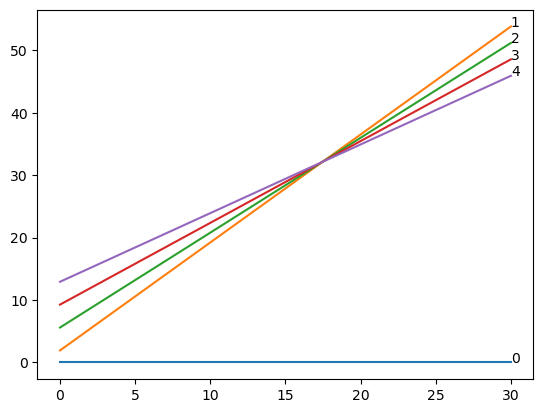

In [10]:
X_ = np.linspace(0,30, 10)
step = 388 
for y_ in range(4):
    Y_ = predict(X_, df.iloc[step*y_].Weight, df.iloc[step*y_].Bias)
    plt.plot(X_, Y_)
    plt.text(X_[-1], Y_[-1], y_)
Y_ =  predict(X_, df.iloc[1551].Weight, df.iloc[1551].Bias)  
plt.plot(X_, Y_)
plt.text(X_[-1], Y_[-1], 4)


In [11]:
m = df.iloc[388].Weight
c = df.iloc[388].Bias


#### Visualise the refinement of model  

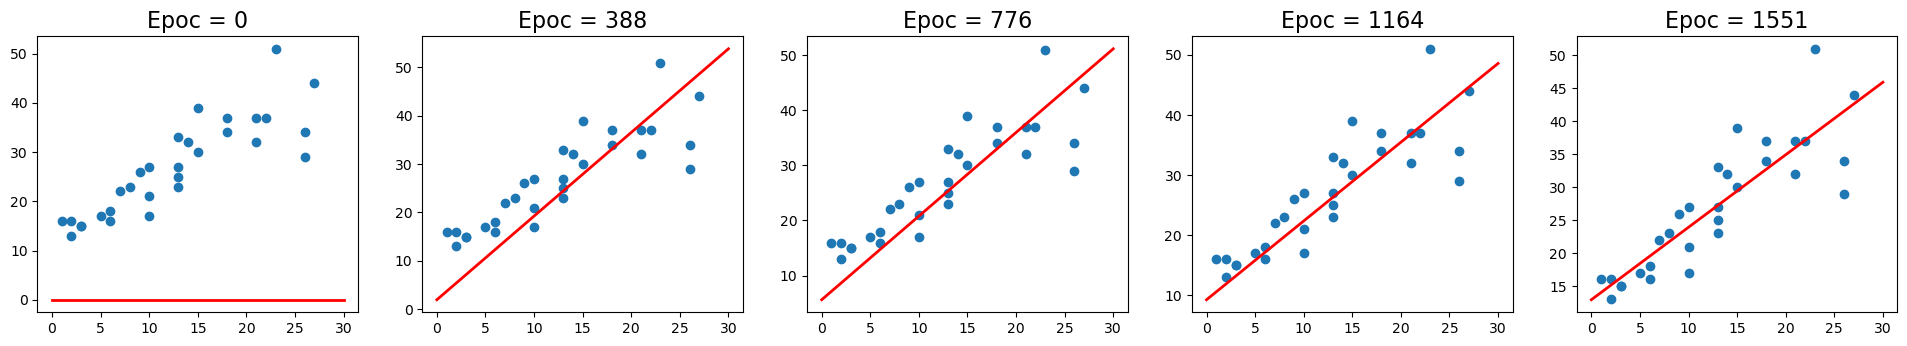

In [17]:
plt.figure(figsize=(24,4))
X_ = np.linspace(0,30, 10)
step = 388

plt.subplot(1,5,1)
plt.title(f"Epoc = {step*0}",fontsize=16)
plt.scatter(X,Y)
plt.plot(X_,predict(X_, df.iloc[step*0].Weight, df.iloc[step*0].Bias), color='red', linewidth=2)

plt.subplot(1,5,2)
plt.title(f"Epoc = {step*1}",fontsize=16)
plt.scatter(X,Y)
plt.plot(X_,predict(X_, df.iloc[step*1].Weight, df.iloc[step*1].Bias), color='red', linewidth=2)

plt.subplot(1,5,3)
plt.title(f"Epoc = {step*2}",fontsize=16)
plt.scatter(X,Y)
plt.plot(X_,predict(X_, df.iloc[step*2].Weight, df.iloc[step*2].Bias), color='red', linewidth=2)

plt.subplot(1,5,4)
plt.title(f"Epoc = {step*3}",fontsize=16)
plt.scatter(X,Y)
plt.plot(X_,predict(X_, df.iloc[step*3].Weight, df.iloc[step*3].Bias), color='red', linewidth=2)


plt.subplot(1,5,5)
plt.title("Epoc = 1551",fontsize=16)
plt.scatter(X,Y)
plt.plot(X_,predict(X_, df.iloc[1551].Weight, df.iloc[1551].Bias), color='red', linewidth=2)

plt.subplots_adjust(top=0.8);

In [13]:
df[df.index % 100 == 0]._append(df.iloc[1551])  # Selects every 3rd raw starting from 0

,Epoch,Weight,Bias,Loss
0,0.0,0.00,0.00,812.866667
100,100.0,1.00,0.00,224.866667
200,200.0,1.84,0.16,68.010347
300,300.0,1.78,1.10,61.714587
400,400.0,1.73,2.05,55.843020
500,500.0,1.67,2.99,50.496353
600,600.0,1.62,3.94,45.581253
700,700.0,1.56,4.88,41.183680
800,800.0,1.51,5.83,37.225047
900,900.0,1.45,6.77,33.776567


#### Using sklearn   

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [15]:
X1 = X.reshape(-1, 1)
model = regressor.fit(X1, Y)

In [16]:
val = randint(5, 50)
print(f"{val} Bookings \nhand-built model: {int(predict(val, w, b))} orders")
print(f"sklearn model:    {int(model.predict([[val]])[0])} orders")

42 Bookings 
hand-built model: 59 orders
sklearn model:    58 orders


#### Task  
03.01 Ordinary Least Squared Regression.ipynb has used sample weight and BMI for OLS Regression.        
Using those sample data, make a hand-built linear regression model (not using sklearn module).     
What is the effect of changing learning rate? 

##### Note   
The implementation here does not exactly use gradient descent, but elaborates the concept.    
We will add a small feature to calcuate the gradient descent and simplify the algorithm.  